# Multi-Layer Perceptron

In this lab you will explore how to create and fit multi-layer perceptron (MLP) models to data.

In [3]:
import sklearn
import numpy as np
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

from sklearn.neural_network import MLPClassifier


First we create a toy dataset using the `make_moons` function.

In [4]:
x,y = make_moons()

The data consists of 2D points and binary labels (0 or 1).

In [5]:
x[:5]

array([[ 0.94905575,  0.31510822],
       [-0.40478334,  0.91441262],
       [ 1.03205158, -0.49948622],
       [ 0.40478334,  0.91441262],
       [-0.57211666,  0.82017225]])

In [6]:
y[:5]

array([0, 0, 1, 0, 0])

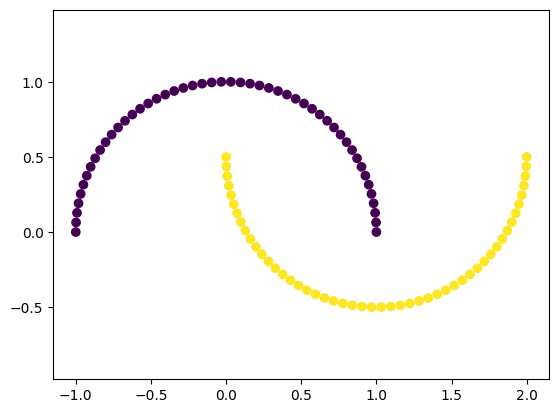

In [7]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.axis('equal')
plt.show()

First we will fit a linear classifier to this data, using the `LogisticRegression` class.

*(Even though it is called "regression," this model is for classification problems.)*

In [8]:
LR = LogisticRegression(penalty=None).fit(x,y)

The `predict` function predicts labels for input data. 

In [9]:
ypred = LR.predict(x)

In [10]:
ypred[:5]

array([1, 0, 1, 0, 0])

The `plot_decision_regions` function from `mlxtend` illustrates how a classification model divides the descriptor space into classes.

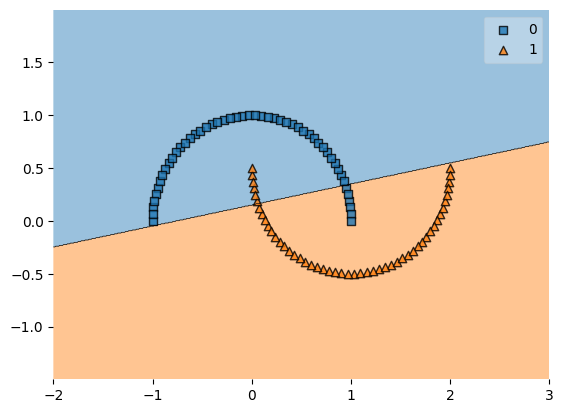

In [11]:
plot_decision_regions(x, y, clf=LR)
plt.show()

Clearly the linear model is unable to separate the moons dataset.

## Exercises

Now it's your turn -- try a MLP on this dataset!

1. Create an `MLPClassifier` and fit it to the moons dataset.  Leave the parameters at the default settings.

Calculate the accuracy on the training set and plot the decision regions.  

In [12]:
mlp = MLPClassifier()
mlp.fit(x, y)
accuracy = mlp.score(x, y)
print(f"Training accuracy: {accuracy:.2f}")

Training accuracy: 0.87


/Users/ishaansathaye/Git/CalPolyCourses/EE428-ComputerVision/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2. Change the parameters of the model until you can reach 100% accuracy.

Here are some ideas: increase the hidden layer size and and add more hidden layers; increase the number of iterations; reduce the regularization strength (```alpha```).

In [35]:
mlp = MLPClassifier(
    hidden_layer_sizes=(200, 200, 200),
    max_iter=10000,
    alpha=0,
    solver='lbfgs',
    random_state=42
)
mlp.fit(x, y)

accuracy = mlp.score(x, y)
print(f"Training accuracy: {accuracy:.2f}")

Training accuracy: 1.00


Here I make some random data with three classes.

In [13]:
x = np.random.random(size=(100,2))
y = np.random.randint(3,size=(100))

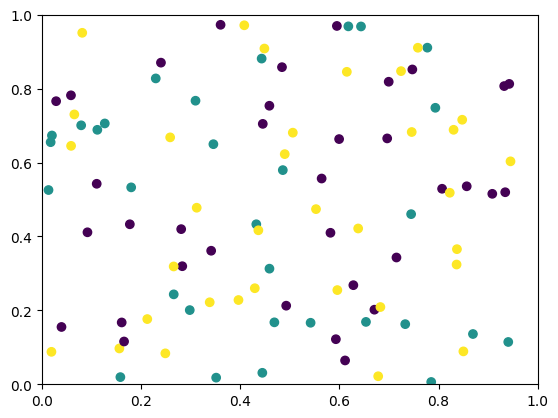

In [14]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

3. Plot the decision regions for the MLP with an increasing number of layers to show the effect of choosing a larger model versus a smaller model.

/Users/ishaansathaye/Git/CalPolyCourses/EE428-ComputerVision/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


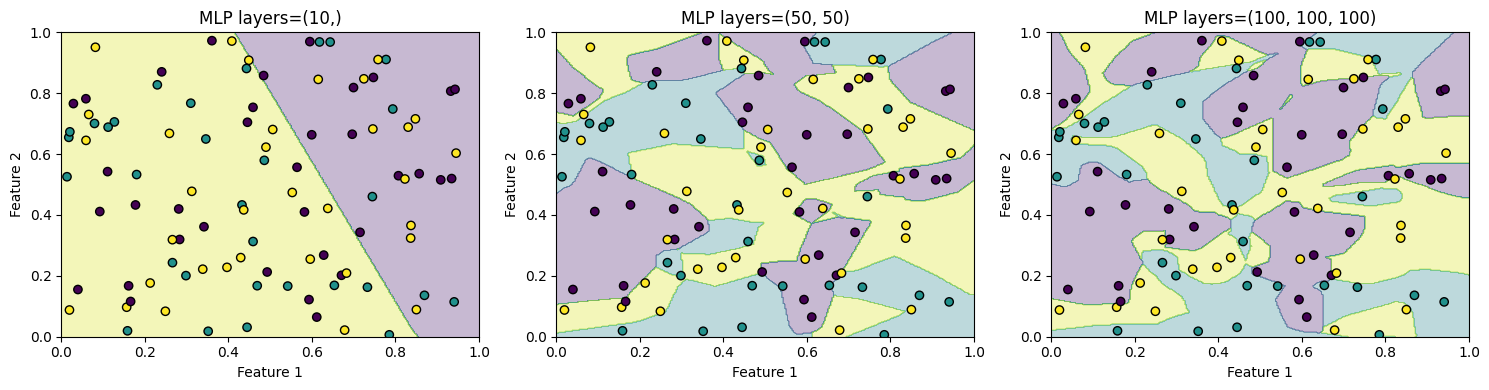

In [ ]:
layer_configs = [
    (10,),           # small model
    (50, 50),        # medium model
    (100, 100, 100)  # large model
]

# grid
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# plots
fig, axes = plt.subplots(1, len(layer_configs), figsize=(5 * len(layer_configs), 4))

for ax, config in zip(axes, layer_configs):
    mlp = MLPClassifier(
        hidden_layer_sizes=config,
        activation='relu',
        solver='adam',
        max_iter=2000,
        random_state=42
    )
    mlp.fit(x, y)

    Z = mlp.predict(grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k')
    ax.set_title(f"MLP layers={config}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()

4. This time, use an MLP with three layers and 200 neurons per layer. Plot the decision regions as you increase regularization strength.

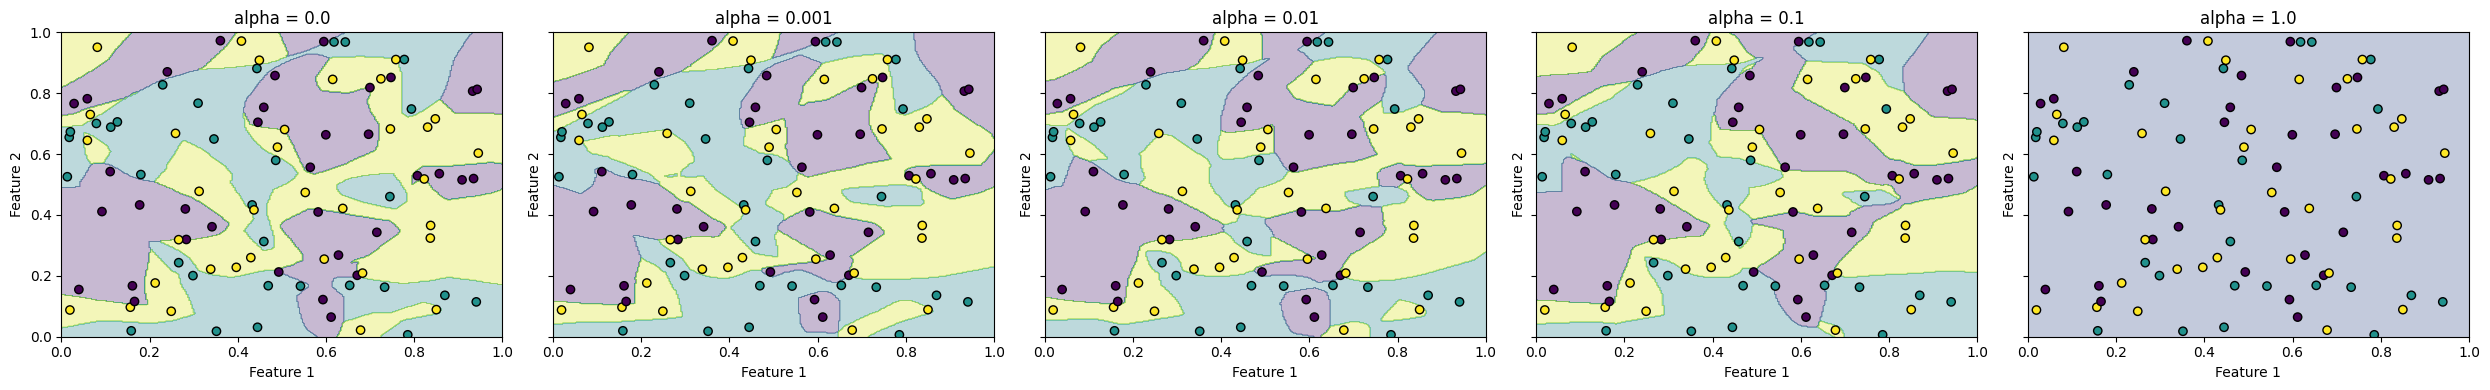

In [ ]:
# grid
x_min, x_max = 0.0, 1.0
y_min, y_max = 0.0, 1.0
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
grid = np.c_[xx.ravel(), yy.ravel()]

# Regularization strengths to compare
alphas = [0.0, 0.001, 0.01, 0.1, 1.0]

# plots
fig, axes = plt.subplots(1, len(alphas), figsize=(5 * len(alphas), 4), sharex=True, sharey=True)

for ax, alpha in zip(axes, alphas):
    # 3 hidden layers, 200 neurons each
    mlp = MLPClassifier(
        hidden_layer_sizes=(200, 200, 200),
        activation='relu',
        solver='adam',
        alpha=alpha,
        max_iter=2000,
        random_state=42
    )
    mlp.fit(x, y)

    Z = mlp.predict(grid).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(x[:, 0], x[:, 1], c=y, edgecolor='k')
    ax.set_title(f"alpha = {alpha}")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

plt.tight_layout()
plt.show()